### First Neural Network - For handwritten Digit classification

In [3]:
! /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install tensorflow



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip


In [4]:
# import dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
x,y = mnist["data"],mnist["target"]


In [5]:
X_train = x.iloc[:60000]
f = X_train
X_test = x.iloc[60000:]
Y_train = y.iloc[:60000].astype(int)
Y_test = y.iloc[60000:].astype(int)

In [6]:
#scaling the features
X_train = X_train/255


In [7]:
import tensorflow as tf
from tensorflow import keras


In [8]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.fit(X_train,Y_train,epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.8759 - loss: 0.4714
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.9145 - loss: 0.3040
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.9208 - loss: 0.2834
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.9237 - loss: 0.2731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.9260 - loss: 0.2668
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.9278 - loss: 0.2616
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.9277 - loss: 0.2581
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.9284 - loss: 0.2560
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.9301 - loss: 0.2530
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.9307 - loss: 0.2510


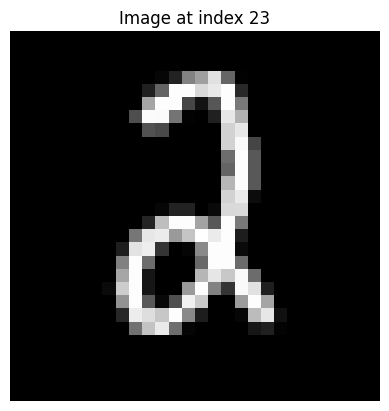

In [10]:
import matplotlib.pyplot as plt

img = X_test.iloc[2112].values.reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.title("Image at index 23")
plt.axis('off')
plt.show()

In [11]:
#prediction on test dataset
s = X_test.iloc[2112].values.reshape(1, 784)
prediction = model.predict(s)
prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0., 0., 1., 1., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [12]:
import numpy as np

predicted_class = np.argmax(prediction)
print(predicted_class)

2


In [13]:
# Adding Hidden Layers into the model
import tensorflow as tf

optimised_model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

#using tensorflow callback to analyse Error 
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

optimised_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
optimised_model.fit(X_train,Y_train,epochs=5,callbacks=[tensorflow_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9229 - loss: 0.2701  
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.9645 - loss: 0.1219
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9751 - loss: 0.0849
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.9805 - loss: 0.0653
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.9844 - loss: 0.0509


In [15]:
# Adding More Hidden Layers into the model

more_optimised_model = keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(300,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


more_optimised_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
more_optimised_model.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9401 - loss: 0.1940
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0870
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0616
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0487
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0396
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0324
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0295
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0246
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0222
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0214
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0148
Epoch 12/15
1875/1875 ━━━━━━━━

In [17]:
#printing confusion matrix for all three models

model_predictions = model.predict(X_test)
optimised_model_predictions = optimised_model.predict(X_test)
more_optimised_model_predictions = more_optimised_model.predict(X_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


In [19]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.6795 - loss: 57.8629


[57.862918853759766, 0.6794999837875366]

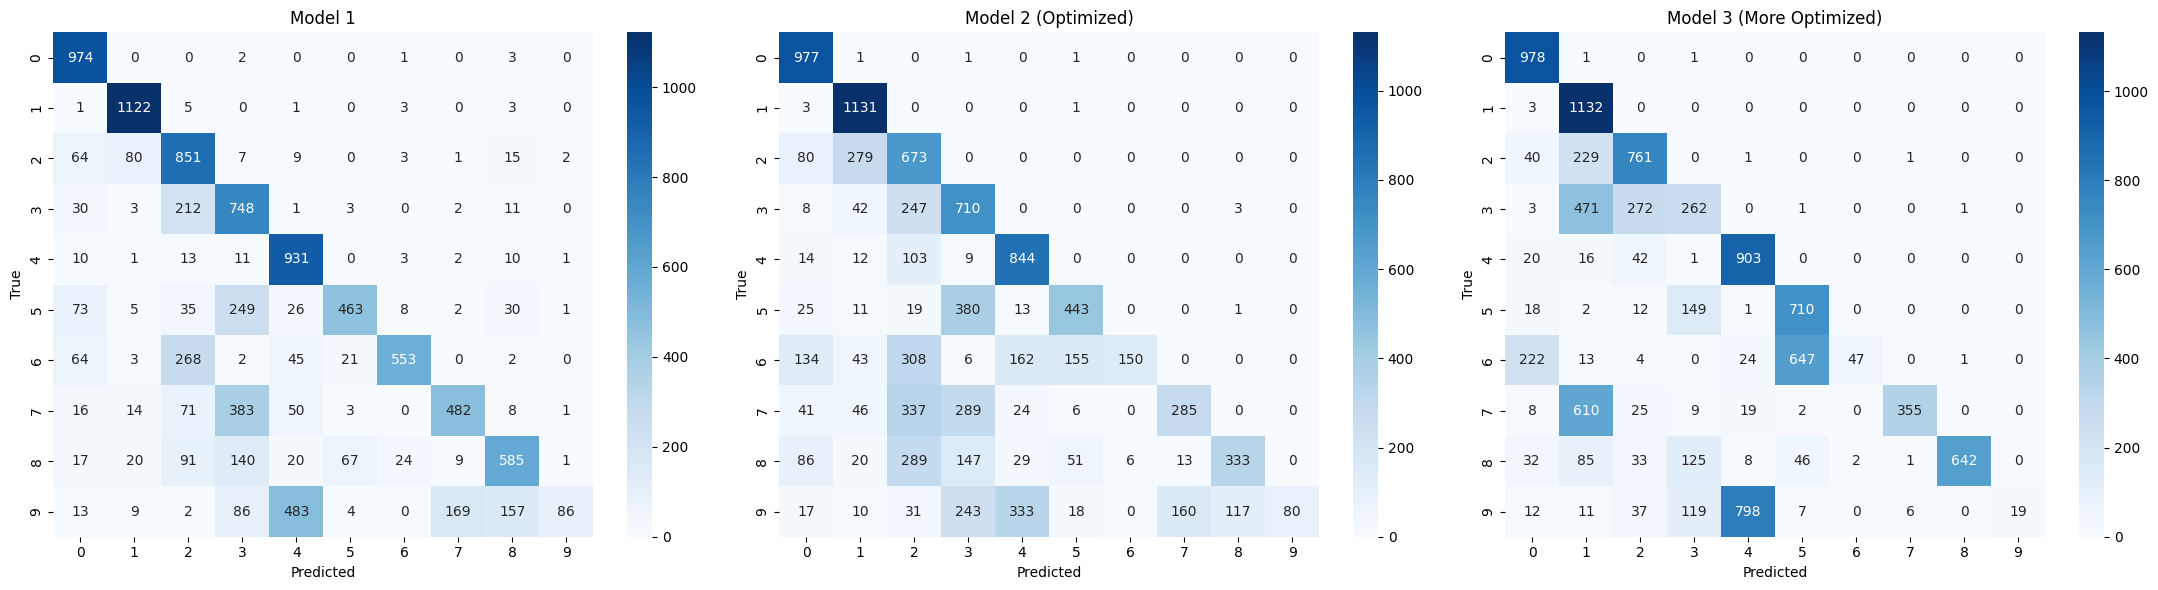

In [18]:
# =====================================
# 1. Import Libraries
# =====================================
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# =====================================
# 2. Convert predictions to class labels
# (Only needed if predictions are probabilities)
# =====================================

# If your predictions look like [[0.1, 0.02, ...]] use argmax
if len(model_predictions.shape) > 1:
    model_predictions = np.argmax(model_predictions, axis=1)

if len(optimised_model_predictions.shape) > 1:
    optimised_model_predictions = np.argmax(optimised_model_predictions, axis=1)

if len(more_optimised_model_predictions.shape) > 1:
    more_optimised_model_predictions = np.argmax(more_optimised_model_predictions, axis=1)

# =====================================
# 3. Compute Confusion Matrices
# =====================================
cm1 = confusion_matrix(Y_test, model_predictions)
cm2 = confusion_matrix(Y_test, optimised_model_predictions)
cm3 = confusion_matrix(Y_test, more_optimised_model_predictions)

# =====================================
# 4. Plot All 3 Confusion Matrices Side-by-Side
# =====================================
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

cms = [cm1, cm2, cm3]
titles = ['Model 1', 'Model 2 (Optimized)', 'Model 3 (More Optimized)']

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()